In [1]:
import matplotlib.pyplot as plt

from utils import (
    get_runs,
    feedback_order
)

In [2]:
runs = get_runs()

In [3]:
folder_path = './figs/subjective_analysis/'

# Pergunta de pesquisa: "Os níveis gerados pelo algoritmo genético refletem a dificuldade percebida pelos jogadores?"

## Plot por nível

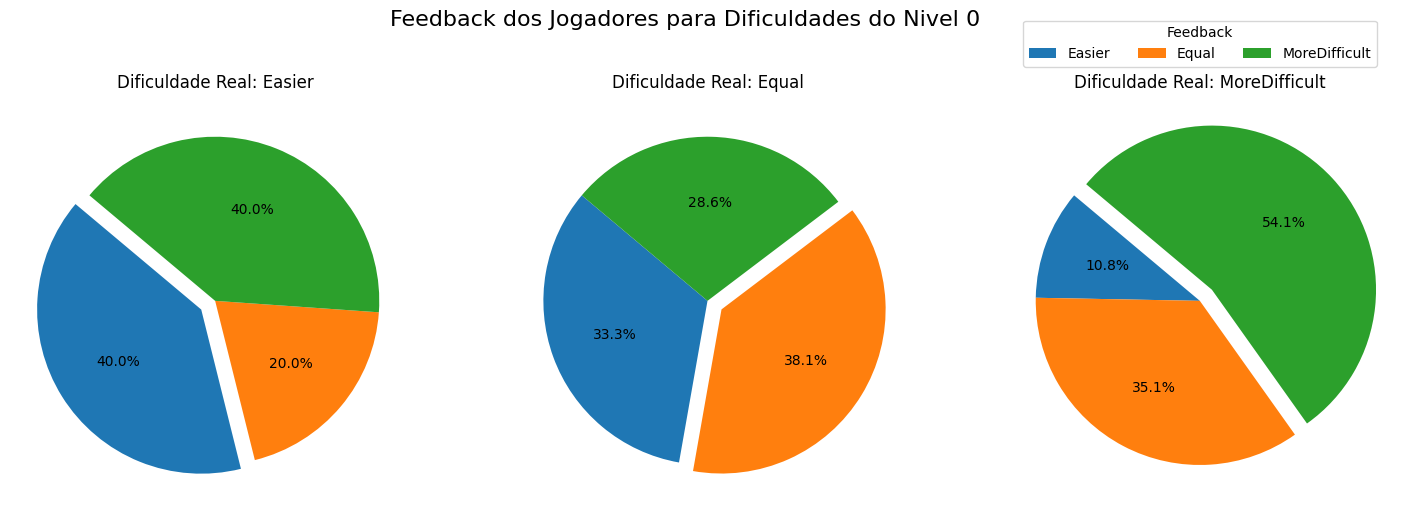

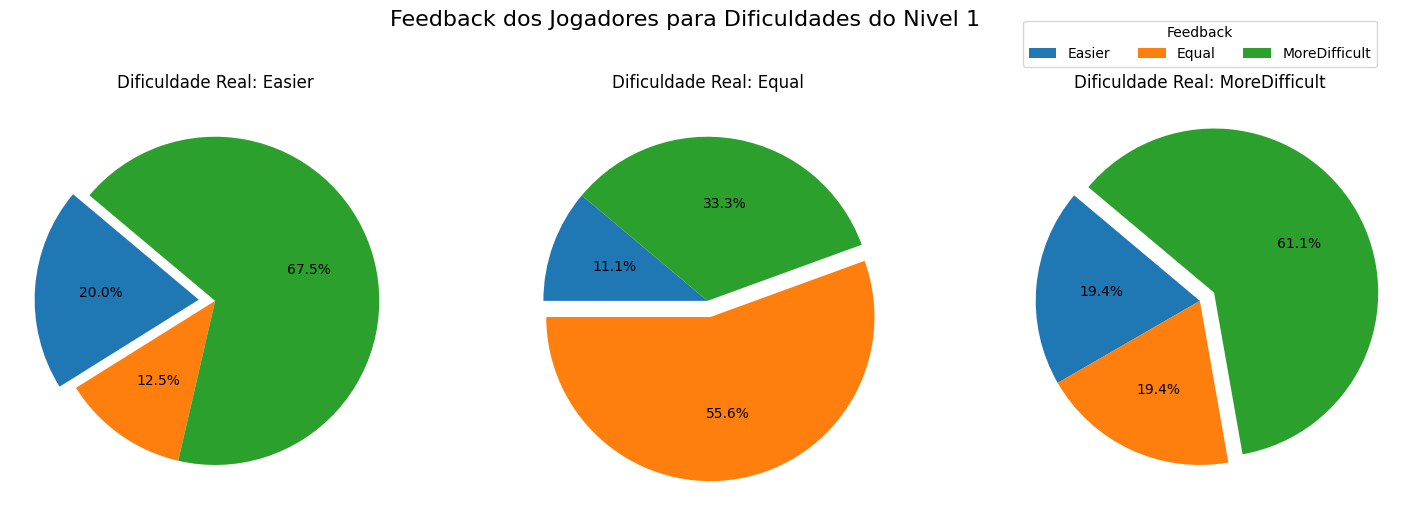

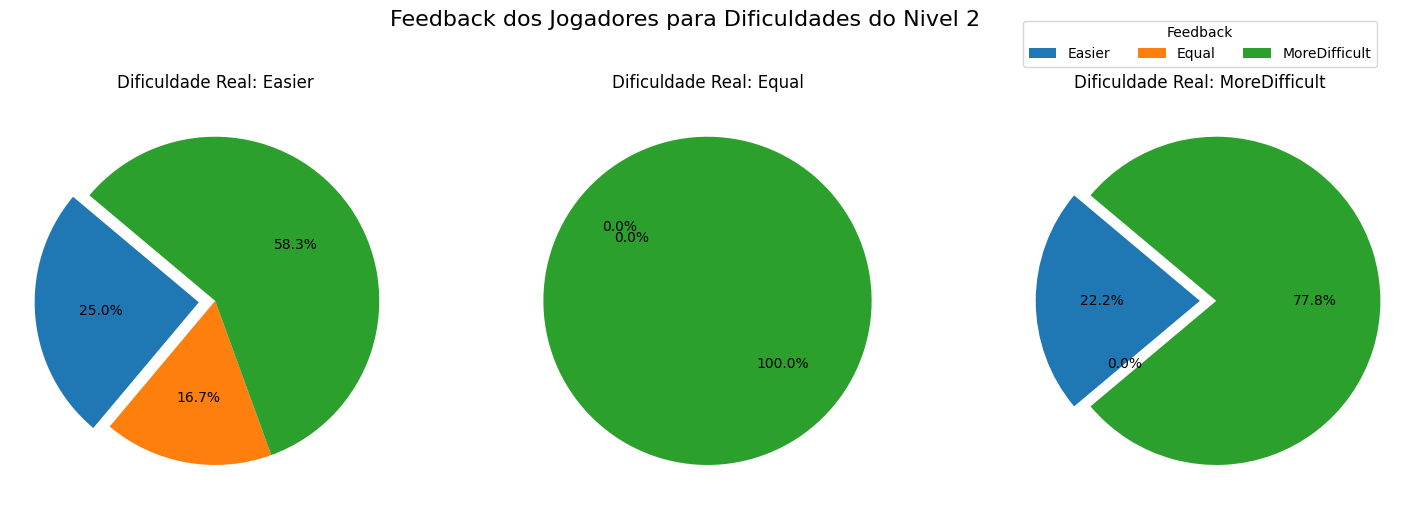

In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for level in runs['level'].unique():
	runs_level_filtered = runs[runs['level'] == level]

	i = 1
	plt.figure(figsize=(18, 6))
	runs_level_filtered = runs_level_filtered[runs_level_filtered['player_feedback'] != '']
	for difficulty in feedback_order:
		filtered_df = runs_level_filtered[runs_level_filtered['actual_difficulty'] == difficulty]

		feedback_counts = filtered_df['player_feedback'].value_counts()
		feedback_counts = feedback_counts.reindex(feedback_order, fill_value=0)

		feedback_percentages = feedback_counts / feedback_counts.sum()

		#print(f"Nível: {level} | Dificuldade Real: {difficulty}")
		#print(feedback_percentages)
		#print("\n")

		explode = [0.1 if feedback == difficulty else 0 for feedback in feedback_counts.index]

		plt.subplot(1, 3, i)
		wedges, texts, autotexts = plt.pie(
			feedback_counts,
			colors=colors,
			autopct='%1.1f%%',
			startangle=140,
			explode=explode
		)

		plt.title(f"Dificuldade Real: {difficulty}")
		i += 1

	plt.legend(wedges, feedback_order, title="Feedback", loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3)
	plt.suptitle(f"Feedback dos Jogadores para Dificuldades do Nivel {level}", fontsize=16)
	plt.savefig(f'{folder_path}/feedback_jogadores_dificuldades_nivel_{level}.png', dpi=96, bbox_inches='tight')
	plt.show()

## Em um plot só

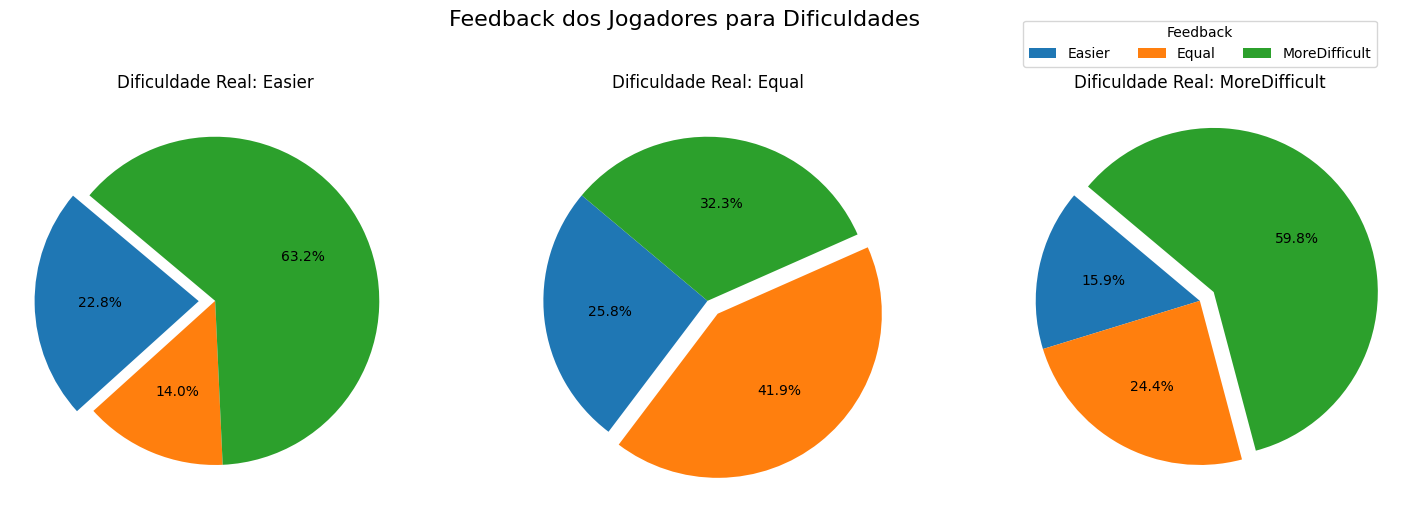

In [5]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

filtered_runs = runs[runs['player_feedback'] != '']

plt.figure(figsize=(18, 6))
i = 1
for difficulty in feedback_order:
    filtered_df = filtered_runs[filtered_runs['actual_difficulty'] == difficulty]
    
    feedback_counts = filtered_df['player_feedback'].value_counts()
    feedback_counts = feedback_counts.reindex(feedback_order, fill_value=0)

    feedback_percentages = feedback_counts / feedback_counts.sum()
    
    #print(f"Para todos os níveis | Dificuldade Real: {difficulty}")
    #print(feedback_percentages)
    #print("\n")
    
    explode = [0.1 if feedback == difficulty else 0 for feedback in feedback_counts.index]
    
    plt.subplot(1, 3, i)
    wedges, texts, autotexts = plt.pie(
        feedback_counts,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode
    )
    
    plt.title(f"Dificuldade Real: {difficulty}")
    i += 1

plt.legend(wedges, feedback_order, title="Feedback", loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3)
plt.suptitle("Feedback dos Jogadores para Dificuldades", fontsize=16)
plt.savefig(f'{folder_path}/feedback_jogadores_dificuldades.png', dpi=96, bbox_inches='tight')
plt.show()